In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [2]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [86]:
df = pd.read_csv('data/etf/jan2025/cleaned/slv_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [87]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [88]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,27.20,9100.0,27.22,4100.0,27.19,...,27.11,200.0,27.31,800.0,0.000,0.010,0.010,0,0,0
1,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,27.21,2700.0,27.22,11200.0,27.20,...,27.12,5200.0,27.31,800.0,0.000,0.010,0.000,0,2,0
2,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,27.21,20300.0,27.23,25500.0,27.20,...,27.12,5200.0,27.32,200.0,0.000,-0.005,0.005,0,0,0
3,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,27.21,18000.0,27.22,2600.0,27.20,...,27.12,5200.0,27.31,800.0,0.000,0.010,0.005,0,2,0
4,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,27.21,23900.0,27.23,25500.0,27.20,...,27.12,5200.0,27.32,200.0,-0.010,-0.005,-0.005,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,SLV,2025-01-31 15:35:23.587710078-05:00,0.000352,0.01,28.425,28.42,3605.0,28.43,9300.0,28.41,...,28.33,2400.0,28.52,400.0,0.025,0.015,0.040,2,2,2
106170,SLV,2025-01-31 15:36:03.037490790-05:00,0.000703,0.02,28.430,28.42,11800.0,28.44,9400.0,28.41,...,28.33,600.0,28.53,100.0,0.015,0.005,0.040,2,0,2
106171,SLV,2025-01-31 15:36:03.707504164-05:00,0.000352,0.01,28.425,28.42,11800.0,28.43,1800.0,28.41,...,28.33,600.0,28.52,1200.0,0.025,0.015,0.040,2,2,2
106172,SLV,2025-01-31 15:36:04.472256257-05:00,0.000352,0.01,28.435,28.43,2900.0,28.44,3900.0,28.42,...,28.34,1200.0,28.53,100.0,0.020,0.010,0.035,2,0,2


In [89]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [90]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SLV,2025-01-03 09:40:00.028091268-05:00,0.000735,0.02,27.210,-1.170929,0.779713,-1.162009,-0.301225,-1.170573,...,-1.157453,-0.584018,-1.148298,-0.048030,0.000,0.010,0.010,0,0,0
1,SLV,2025-01-03 09:40:00.375169630-05:00,0.000367,0.01,27.215,-1.150236,-0.592043,-1.162009,1.177274,-1.149882,...,-1.136899,3.669561,-1.148298,-0.048030,0.000,0.010,0.000,0,2,0
2,SLV,2025-01-03 09:40:05.023122125-05:00,0.000735,0.02,27.220,-1.150236,3.180284,-1.141317,4.155095,-1.149882,...,-1.136899,3.669561,-1.128105,-0.577182,0.000,-0.005,0.005,0,0,0
3,SLV,2025-01-03 09:40:05.447334991-05:00,0.000367,0.01,27.215,-1.150236,2.687310,-1.162009,-0.613584,-1.149882,...,-1.136899,3.669561,-1.148298,-0.048030,0.000,0.010,0.005,0,2,0
4,SLV,2025-01-03 09:40:07.162635990-05:00,0.000735,0.02,27.220,-1.150236,3.951897,-1.141317,4.155095,-1.149882,...,-1.136899,3.669561,-1.128105,-0.577182,-0.010,-0.005,-0.005,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,SLV,2025-01-31 15:35:23.587710078-05:00,0.000352,0.01,28.425,1.353589,-0.398068,1.341740,0.781619,1.353673,...,1.350134,1.287556,1.294976,-0.400798,0.025,0.015,0.040,2,2,2
106170,SLV,2025-01-31 15:36:03.037490790-05:00,0.000703,0.02,28.430,1.353589,1.358422,1.362432,0.802443,1.353673,...,1.350134,-0.243732,1.315169,-0.665374,0.015,0.005,0.040,2,0,2
106171,SLV,2025-01-31 15:36:03.707504164-05:00,0.000352,0.01,28.425,1.353589,1.358422,1.341740,-0.780175,1.353673,...,1.350134,-0.243732,1.294976,0.304737,0.025,0.015,0.040,2,2,2
106172,SLV,2025-01-31 15:36:04.472256257-05:00,0.000352,0.01,28.435,1.374281,-0.549175,1.362432,-0.342873,1.374363,...,1.370688,0.266697,1.315169,-0.665374,0.020,0.010,0.035,2,0,2


In [91]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [92]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-1.170929,-1.170573,-1.170162,-1.169475,-1.168460,-1.167071,-1.165924,-1.164351,-1.162287,-1.157453,...,-0.006842,-0.522371,-0.561154,-0.613647,0.386100,-0.268494,-0.048030,0,0,0
1,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,4.342381,3.858108,-0.561154,-0.613647,0.386100,-0.268494,-0.048030,0,2,0
2,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,3.548942,3.443739,-0.924329,-0.083797,-0.403254,-0.268494,-0.577182,0,0,0
3,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,4.342381,3.858108,3.917997,-0.613647,0.386100,-0.268494,-0.048030,0,2,0
4,-1.150236,-1.149882,-1.149475,-1.148792,-1.147787,-1.146413,-1.145277,-1.143720,-1.141677,-1.136899,...,3.548942,3.443739,-0.924329,-0.083797,-0.403254,-0.268494,-0.577182,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.815984,0.543151,-0.803271,-0.500108,-0.121342,0.028994,-0.400798,2,2,2
106170,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.257637,-0.522371,-0.833535,-0.424415,-0.177725,0.028994,-0.665374,2,0,2
106171,1.353589,1.353673,1.353685,1.353779,1.353610,1.353265,1.353089,1.352680,1.352190,1.350134,...,0.845370,0.543151,-0.137451,-0.500108,-0.121342,0.028994,0.304737,2,2,2
106172,1.374281,1.374363,1.374373,1.374461,1.374283,1.373924,1.373737,1.373312,1.372801,1.370688,...,0.257637,-0.522371,-0.833535,-0.424415,-0.177725,0.028994,-0.665374,2,0,2


In [93]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [94]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03     3091
2025-01-06     5516
2025-01-07     6412
2025-01-08     7171
2025-01-10     9715
2025-01-13     5359
2025-01-14     5024
2025-01-15     6418
2025-01-16     4973
2025-01-17     3398
2025-01-21     3581
2025-01-22     2582
2025-01-23     3242
2025-01-24     4269
2025-01-27     4396
2025-01-28     4010
2025-01-29    10478
2025-01-30     6163
2025-01-31    10376
dtype: int64

In [95]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [96]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [97]:
df_test.to_numpy()[:, -3:]

array([[0., 1., 1.],
       [0., 1., 1.],
       [2., 1., 1.],
       ...,
       [2., 2., 2.],
       [2., 0., 2.],
       [0., 2., 2.]], shape=(31027, 3))

In [98]:
from models.dataset import Dataset as Dataset

batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([56978, 1, 100, 40]) torch.Size([56978])


In [99]:
from models.cnn1 import CNN1
from models.cnn2 import CNN2

In [100]:
model = CNN1(num_classes = dataset_train.num_classes)
model.to(device)

CNN1(
  (conv1): Conv2d(1, 16, kernel_size=(4, 40), stride=(1, 1), padding=(3, 0), dilation=(2, 1))
  (relu1): LeakyReLU(negative_slope=0.01)
  (conv2): Conv1d(16, 16, kernel_size=(4,), stride=(1,))
  (relu2): LeakyReLU(negative_slope=0.01)
  (maxpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (relu3): LeakyReLU(negative_slope=0.01)
  (conv4): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(2,))
  (relu4): LeakyReLU(negative_slope=0.01)
  (maxpool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=832, out_features=32, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=32, out_features=3, bias=True)
)

In [101]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [102]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [103]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:03<02:27,  3.00s/it]

model saved
Epoch 1/50, Train Loss: 1.0589,           Validation Loss: 1.0427, Duration: 0:00:03.001005, Best Val Epoch: 0


  4%|▍         | 2/50 [00:06<02:25,  3.04s/it]

model saved
Epoch 2/50, Train Loss: 1.0325,           Validation Loss: 1.0181, Duration: 0:00:03.064783, Best Val Epoch: 1


  6%|▌         | 3/50 [00:09<02:29,  3.18s/it]

model saved
Epoch 3/50, Train Loss: 1.0082,           Validation Loss: 0.9996, Duration: 0:00:03.343498, Best Val Epoch: 2


  8%|▊         | 4/50 [00:12<02:33,  3.34s/it]

model saved
Epoch 4/50, Train Loss: 0.9854,           Validation Loss: 0.9693, Duration: 0:00:03.585595, Best Val Epoch: 3


 10%|█         | 5/50 [00:16<02:26,  3.26s/it]

model saved
Epoch 5/50, Train Loss: 0.9606,           Validation Loss: 0.9380, Duration: 0:00:03.116988, Best Val Epoch: 4


 12%|█▏        | 6/50 [00:18<02:15,  3.07s/it]

model saved
Epoch 6/50, Train Loss: 0.9343,           Validation Loss: 0.9096, Duration: 0:00:02.716659, Best Val Epoch: 5


 14%|█▍        | 7/50 [00:22<02:16,  3.18s/it]

model saved
Epoch 7/50, Train Loss: 0.9081,           Validation Loss: 0.8868, Duration: 0:00:03.388442, Best Val Epoch: 6


 16%|█▌        | 8/50 [00:25<02:13,  3.17s/it]

model saved
Epoch 8/50, Train Loss: 0.8792,           Validation Loss: 0.8573, Duration: 0:00:03.163397, Best Val Epoch: 7


 18%|█▊        | 9/50 [00:28<02:13,  3.26s/it]

model saved
Epoch 9/50, Train Loss: 0.8521,           Validation Loss: 0.8534, Duration: 0:00:03.445487, Best Val Epoch: 8


 20%|██        | 10/50 [00:32<02:10,  3.25s/it]

model saved
Epoch 10/50, Train Loss: 0.8253,           Validation Loss: 0.8082, Duration: 0:00:03.245824, Best Val Epoch: 9


 22%|██▏       | 11/50 [00:35<02:06,  3.25s/it]

model saved
Epoch 11/50, Train Loss: 0.8014,           Validation Loss: 0.7777, Duration: 0:00:03.234204, Best Val Epoch: 10


 24%|██▍       | 12/50 [00:38<02:06,  3.34s/it]

model saved
Epoch 12/50, Train Loss: 0.7792,           Validation Loss: 0.7721, Duration: 0:00:03.546997, Best Val Epoch: 11


 26%|██▌       | 13/50 [00:42<02:06,  3.43s/it]

model saved
Epoch 13/50, Train Loss: 0.7582,           Validation Loss: 0.7528, Duration: 0:00:03.626201, Best Val Epoch: 12


 28%|██▊       | 14/50 [00:46<02:08,  3.57s/it]

model saved
Epoch 14/50, Train Loss: 0.7393,           Validation Loss: 0.7247, Duration: 0:00:03.905957, Best Val Epoch: 13


 30%|███       | 15/50 [00:49<02:00,  3.44s/it]

model saved
Epoch 15/50, Train Loss: 0.7208,           Validation Loss: 0.6993, Duration: 0:00:03.144973, Best Val Epoch: 14


 32%|███▏      | 16/50 [00:52<01:56,  3.43s/it]

Epoch 16/50, Train Loss: 0.7088,           Validation Loss: 0.7080, Duration: 0:00:03.402774, Best Val Epoch: 14


 34%|███▍      | 17/50 [00:56<01:54,  3.47s/it]

Epoch 17/50, Train Loss: 0.7014,           Validation Loss: 0.7209, Duration: 0:00:03.554603, Best Val Epoch: 14


 36%|███▌      | 18/50 [00:59<01:50,  3.45s/it]

model saved
Epoch 18/50, Train Loss: 0.6885,           Validation Loss: 0.6782, Duration: 0:00:03.407198, Best Val Epoch: 17


 38%|███▊      | 19/50 [01:03<01:44,  3.38s/it]

model saved
Epoch 19/50, Train Loss: 0.6744,           Validation Loss: 0.6608, Duration: 0:00:03.210883, Best Val Epoch: 18


 40%|████      | 20/50 [01:06<01:42,  3.40s/it]

model saved
Epoch 20/50, Train Loss: 0.6666,           Validation Loss: 0.6498, Duration: 0:00:03.458921, Best Val Epoch: 19


 42%|████▏     | 21/50 [01:09<01:38,  3.40s/it]

model saved
Epoch 21/50, Train Loss: 0.6605,           Validation Loss: 0.6357, Duration: 0:00:03.403595, Best Val Epoch: 20


 44%|████▍     | 22/50 [01:13<01:34,  3.38s/it]

Epoch 22/50, Train Loss: 0.6509,           Validation Loss: 0.6378, Duration: 0:00:03.314834, Best Val Epoch: 20


 46%|████▌     | 23/50 [01:16<01:29,  3.33s/it]

model saved
Epoch 23/50, Train Loss: 0.6427,           Validation Loss: 0.6353, Duration: 0:00:03.204775, Best Val Epoch: 22


 48%|████▊     | 24/50 [01:20<01:27,  3.38s/it]

model saved
Epoch 24/50, Train Loss: 0.6341,           Validation Loss: 0.6345, Duration: 0:00:03.515258, Best Val Epoch: 23


 50%|█████     | 25/50 [01:23<01:24,  3.39s/it]

model saved
Epoch 25/50, Train Loss: 0.6277,           Validation Loss: 0.6031, Duration: 0:00:03.419597, Best Val Epoch: 24


 52%|█████▏    | 26/50 [01:26<01:20,  3.34s/it]

Epoch 26/50, Train Loss: 0.6213,           Validation Loss: 0.6076, Duration: 0:00:03.199467, Best Val Epoch: 24


 54%|█████▍    | 27/50 [01:29<01:16,  3.34s/it]

Epoch 27/50, Train Loss: 0.6171,           Validation Loss: 0.6188, Duration: 0:00:03.350739, Best Val Epoch: 24


 56%|█████▌    | 28/50 [01:33<01:13,  3.33s/it]

Epoch 28/50, Train Loss: 0.6051,           Validation Loss: 0.6047, Duration: 0:00:03.290627, Best Val Epoch: 24


 58%|█████▊    | 29/50 [01:36<01:10,  3.36s/it]

model saved
Epoch 29/50, Train Loss: 0.6006,           Validation Loss: 0.5797, Duration: 0:00:03.434522, Best Val Epoch: 28


 60%|██████    | 30/50 [01:40<01:07,  3.38s/it]

Epoch 30/50, Train Loss: 0.5956,           Validation Loss: 0.6109, Duration: 0:00:03.415885, Best Val Epoch: 28


 62%|██████▏   | 31/50 [01:43<01:04,  3.38s/it]

model saved
Epoch 31/50, Train Loss: 0.5909,           Validation Loss: 0.5685, Duration: 0:00:03.378912, Best Val Epoch: 30


 64%|██████▍   | 32/50 [01:46<00:59,  3.32s/it]

Epoch 32/50, Train Loss: 0.5809,           Validation Loss: 0.5725, Duration: 0:00:03.203009, Best Val Epoch: 30


 66%|██████▌   | 33/50 [01:50<00:56,  3.34s/it]

Epoch 33/50, Train Loss: 0.5787,           Validation Loss: 0.5693, Duration: 0:00:03.378567, Best Val Epoch: 30


 68%|██████▊   | 34/50 [01:53<00:53,  3.36s/it]

model saved
Epoch 34/50, Train Loss: 0.5713,           Validation Loss: 0.5674, Duration: 0:00:03.414707, Best Val Epoch: 33


 70%|███████   | 35/50 [01:56<00:46,  3.12s/it]

model saved
Epoch 35/50, Train Loss: 0.5656,           Validation Loss: 0.5517, Duration: 0:00:02.541615, Best Val Epoch: 34


 72%|███████▏  | 36/50 [01:59<00:45,  3.23s/it]

model saved
Epoch 36/50, Train Loss: 0.5593,           Validation Loss: 0.5443, Duration: 0:00:03.494286, Best Val Epoch: 35


 74%|███████▍  | 37/50 [02:02<00:42,  3.25s/it]

model saved
Epoch 37/50, Train Loss: 0.5582,           Validation Loss: 0.5298, Duration: 0:00:03.302283, Best Val Epoch: 36


 76%|███████▌  | 38/50 [02:06<00:39,  3.30s/it]

Epoch 38/50, Train Loss: 0.5499,           Validation Loss: 0.5552, Duration: 0:00:03.395754, Best Val Epoch: 36


 78%|███████▊  | 39/50 [02:09<00:36,  3.33s/it]

Epoch 39/50, Train Loss: 0.5463,           Validation Loss: 0.5361, Duration: 0:00:03.394461, Best Val Epoch: 36


 80%|████████  | 40/50 [02:12<00:33,  3.32s/it]

model saved
Epoch 40/50, Train Loss: 0.5393,           Validation Loss: 0.5275, Duration: 0:00:03.311839, Best Val Epoch: 39


 82%|████████▏ | 41/50 [02:16<00:30,  3.34s/it]

model saved
Epoch 41/50, Train Loss: 0.5375,           Validation Loss: 0.5192, Duration: 0:00:03.393850, Best Val Epoch: 40


 84%|████████▍ | 42/50 [02:19<00:26,  3.37s/it]

Epoch 42/50, Train Loss: 0.5325,           Validation Loss: 0.5271, Duration: 0:00:03.440239, Best Val Epoch: 40


 86%|████████▌ | 43/50 [02:23<00:23,  3.37s/it]

Epoch 43/50, Train Loss: 0.5306,           Validation Loss: 0.5439, Duration: 0:00:03.351681, Best Val Epoch: 40


 88%|████████▊ | 44/50 [02:26<00:19,  3.32s/it]

model saved
Epoch 44/50, Train Loss: 0.5277,           Validation Loss: 0.5129, Duration: 0:00:03.214568, Best Val Epoch: 43


 90%|█████████ | 45/50 [02:29<00:16,  3.23s/it]

model saved
Epoch 45/50, Train Loss: 0.5193,           Validation Loss: 0.4940, Duration: 0:00:03.031597, Best Val Epoch: 44


 92%|█████████▏| 46/50 [02:31<00:11,  2.87s/it]

model saved
Epoch 46/50, Train Loss: 0.5158,           Validation Loss: 0.4936, Duration: 0:00:02.014289, Best Val Epoch: 45


 94%|█████████▍| 47/50 [02:34<00:08,  2.96s/it]

Epoch 47/50, Train Loss: 0.5166,           Validation Loss: 0.5212, Duration: 0:00:03.185442, Best Val Epoch: 45


 96%|█████████▌| 48/50 [02:37<00:05,  2.92s/it]

model saved
Epoch 48/50, Train Loss: 0.5079,           Validation Loss: 0.4866, Duration: 0:00:02.811199, Best Val Epoch: 47


 98%|█████████▊| 49/50 [02:40<00:03,  3.05s/it]

Epoch 49/50, Train Loss: 0.5052,           Validation Loss: 0.4943, Duration: 0:00:03.348802, Best Val Epoch: 47


100%|██████████| 50/50 [02:44<00:00,  3.28s/it]

model saved
Epoch 50/50, Train Loss: 0.5050,           Validation Loss: 0.4847, Duration: 0:00:03.489459, Best Val Epoch: 49


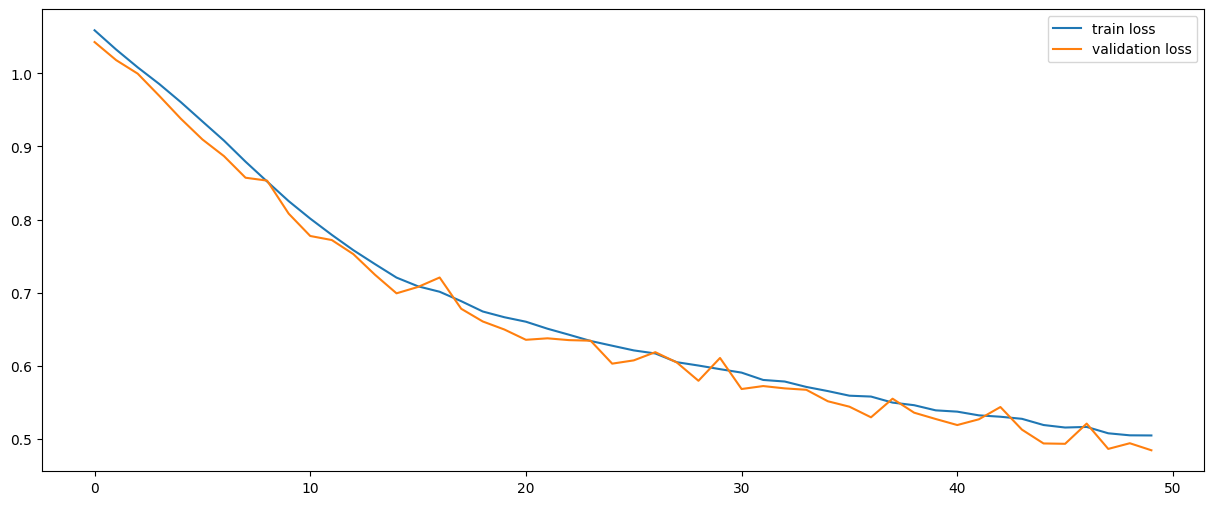

In [104]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [105]:
state = torch.load('./best_val_model_pytorch.pt')
model = CNN1(num_classes = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.7958


In [106]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [107]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.7958334795886132
              precision    recall  f1-score   support

           0     0.6509    0.4766    0.5503     13280
           1     0.8440    0.8834    0.8633     21230
           2     0.8094    0.9018    0.8531     22468

    accuracy                         0.7958     56978
   macro avg     0.7681    0.7539    0.7555     56978
weighted avg     0.7853    0.7958    0.7863     56978



In [108]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100  Count  Percent
0           0  23170    21.82
1           1  40368    38.02
2           2  42636    40.16
